In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
test=['filename_015.csv','filename_022.csv','filename_015.csv','filename_026.csv','filename_033.csv',
     'filename_035.csv','filename_036.csv','filename_039.csv','filename_043.csv','filename_048.csv',
     'filename_049.csv','filename_057.csv','filename_058.csv','filename_067.csv','filename_070.csv',
     'filename_073.csv','filename_075.csv','filename_077.csv','filename_081.csv','filename_097.csv',
     'filename_100.csv','filename_105.csv','filename_106.csv','filename_110.csv','filename_113.csv',
     'filename_119.csv','filename_127.csv','filename_130.csv','filename_139.csv','filename_141.csv',
     'filename_147.csv','filename_150.csv','filename_151.csv','filename_156.csv','filename_157.csv',
     'filename_158.csv','filename_168.csv','filename_175.csv','filename_177.csv','filename_193.csv']

In [5]:
# file_name in list file_name
# action_name in list file_name
# ID number, input type is string
# label is file ID_Gender_Age_datasets.csv
# You can change the combination of file_name, action_name and ID
def plot_the_data(path_name): 
    try:
        df=pd.read_csv('TestData'+'/'+path_name,skiprows=2)
#         df=df[:700]
        insert_line=pd.DataFrame(df.columns.values).T
        df.columns=insert_line.columns
        df=pd.concat([insert_line,df],axis=0)
        df.columns=['Gx','Gy','Gz','Ax','Ay','Az']
        df['Gx']=df['Gx'].astype(float)
        df['Gy']=df['Gy'].astype(float)
        df['Gz']=df['Gz'].astype(float)
        df['Ax']=df['Ax'].astype(float)
        df['Ay']=df['Ay'].astype(float)
        df['Az']=df['Az'].astype(float)
        df['Gx']=(df['Gx']-df['Gx'].min())/df['Gx'].std()
        df['Gy']=(df['Gy']-df['Gy'].min())/df['Gy'].std()
        df['Gz']=(df['Gz']-df['Gz'].min())/df['Gz'].std()
        df['Ax']=(df['Ax']-df['Ax'].min())/df['Ax'].std()
        df['Ay']=(df['Ay']-df['Ay'].min())/df['Ay'].std()
        df['Az']=(df['Az']-df['Az'].min())/df['Az'].std()
        print('From the file: %s'%path_name)

        x = range(len(df)) 
        plt.figure(figsize=(18,10)) 
        plt.subplot(211)
        plt.plot(x,df['Gx'],"b",linewidth=1.5) 
        plt.plot(x,df['Gy'],"r",linewidth=1.5) 
        plt.plot(x,df['Gz'],"g",linewidth=1.2) 
        plt.ylabel("Angular velocity[Rad/s]")  
        plt.title("Path name:"+path_name) 
        plt.legend()
        ax = plt.gca()
        ax.xaxis.set_ticks_position('bottom')
        ax.spines['bottom'].set_position(('data', 0))
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        plt.subplot(212)
        plt.plot(x,df['Ax'],"b",linewidth=1.5) 
        plt.plot(x,df['Ay'],"r",linewidth=1.5) 
        plt.plot(x,df['Az'],"g",linewidth=1.5) 
        plt.ylabel("Acceleration[g]")  
        plt.legend()
        ax = plt.gca()
        ax.xaxis.set_ticks_position('bottom')
        ax.spines['bottom'].set_position(('data', 0))
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.show()
    except:
        print('This dataset/file is not exist')

In [31]:
def generate_cleaned_datasets(path_name):
    df=pd.read_csv('TestData'+'/'+path_name,skiprows=2)
    insert_line=pd.DataFrame(df.columns.values).T
    df.columns=insert_line.columns
    df=pd.concat([insert_line,df],axis=0)
    df.columns=['Gx','Gy','Gz','Ax','Ay','Az']
    df['Gx']=df['Gx'].astype(float)
    df['Gy']=df['Gy'].astype(float)
    df['Gz']=df['Gz'].astype(float)
    df['Ax']=df['Ax'].astype(float)
    df['Ay']=df['Ay'].astype(float)
    df['Az']=df['Az'].astype(float)
    df.index=range(len(df))
    inter=20
    dataframe=pd.DataFrame()
    for d in range(1,len(df)//inter+1):
        Gx=df['Gx'].values[inter*d-inter:inter*d].var()
        Gy=df['Gy'].values[inter*d-inter:inter*d].var()
        Gz=df['Gz'].values[inter*d-inter:inter*d].var()
        Ax=df['Ax'].values[inter*d-inter:inter*d].var()
        Ay=df['Ay'].values[inter*d-inter:inter*d].var()
        Az=df['Az'].values[inter*d-inter:inter*d].var()
        if(Gx>0.005 and Gy>0.001 and Gz>0.003 and Ax>0.0005 and Ay>0.0005 and Az>0.0005):
            dataframe=pd.concat([dataframe,df[inter*(d-1):inter*d]])
        else:
            zero_df=pd.DataFrame(np.zeros([inter,6]),columns=['Gx','Gy','Gz','Ax','Ay','Az'])
            zero_df.index=list(df[inter*d-inter:inter*d].index)
            dataframe=pd.concat([dataframe,zero_df])
    return dataframe,path_name

================================This part of code is core part=============================

In [32]:
def generate_cleaned_datasets_remove(path_name):
    df=pd.read_csv('TestData'+'/'+path_name,skiprows=2)
    insert_line=pd.DataFrame(df.columns.values).T
    df.columns=insert_line.columns
    df=pd.concat([insert_line,df],axis=0)
    df.columns=['Gx','Gy','Gz','Ax','Ay','Az']
    df['Gx']=df['Gx'].astype(float)
    df['Gy']=df['Gy'].astype(float)
    df['Gz']=df['Gz'].astype(float)
    df['Ax']=df['Ax'].astype(float)
    df['Ay']=df['Ay'].astype(float)
    df['Az']=df['Az'].astype(float)
    df.index=range(len(df))
#inter is the length of series to calculate var;
    inter=20
    dataframe=pd.DataFrame()
#Gx,Gy,Gz,Ax,Ay,Az are the various of column Gx,Gy,Gz,Ax,Ay,Az;
    for d in range(1,len(df)//inter+1):
        Gx=df['Gx'].values[inter*d-inter:inter*d].var()
        Gy=df['Gy'].values[inter*d-inter:inter*d].var()
        Gz=df['Gz'].values[inter*d-inter:inter*d].var()
        Ax=df['Ax'].values[inter*d-inter:inter*d].var()
        Ay=df['Ay'].values[inter*d-inter:inter*d].var()
        Az=df['Az'].values[inter*d-inter:inter*d].var()
#The threshold of var Gx,Gy,Gz are 0.001 and Ax,Ay,Az are 0.0005;
        if(Gx>0.001 and Gy>0.001 and Gz>0.001 and Ax>0.0005 and Ay>0.0005 and Az>0.0005):
            dataframe=pd.concat([dataframe,df[inter*(d-1):inter*d]])
    return dataframe,path_name

In [36]:
def plot_cleaned_datasets(dataframe,path_name):
    x = range(len(dataframe)) 
    plt.figure(figsize=(18,10)) 
    plt.subplot(211)
    plt.plot(x,dataframe['Gx'],"b",linewidth=1.5) 
    plt.plot(x,dataframe['Gy'],"r",linewidth=1.5) 
    plt.plot(x,dataframe['Gz'],"g",linewidth=1.2) 
    plt.ylabel("Angular velocity[Rad/s]")  
    plt.title("Path name:"+path_name) 
    plt.legend()
    ax = plt.gca()
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.subplot(212)
    plt.plot(x,dataframe['Ax'],"b",linewidth=1.5) 
    plt.plot(x,dataframe['Ay'],"r",linewidth=1.5) 
    plt.plot(x,dataframe['Az'],"g",linewidth=1.5) 
    plt.ylabel("Acceleration[g]")  
    plt.legend()
    ax = plt.gca()
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
#     plt.savefig(path_name[:-4]+'_showCleaned.png')
    plt.savefig(path_name[:-4]+'_merged.png')
    plt.show()

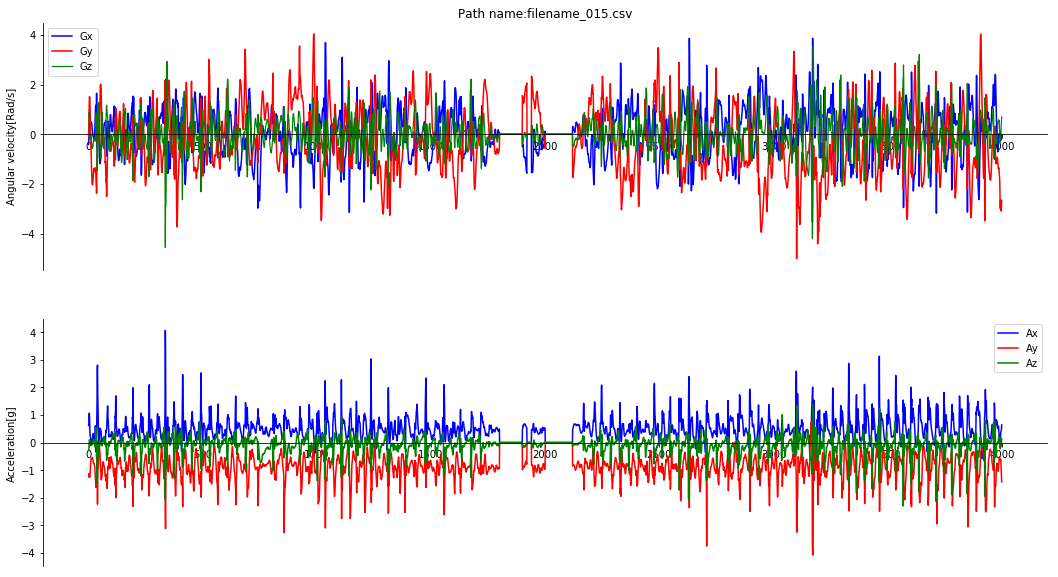

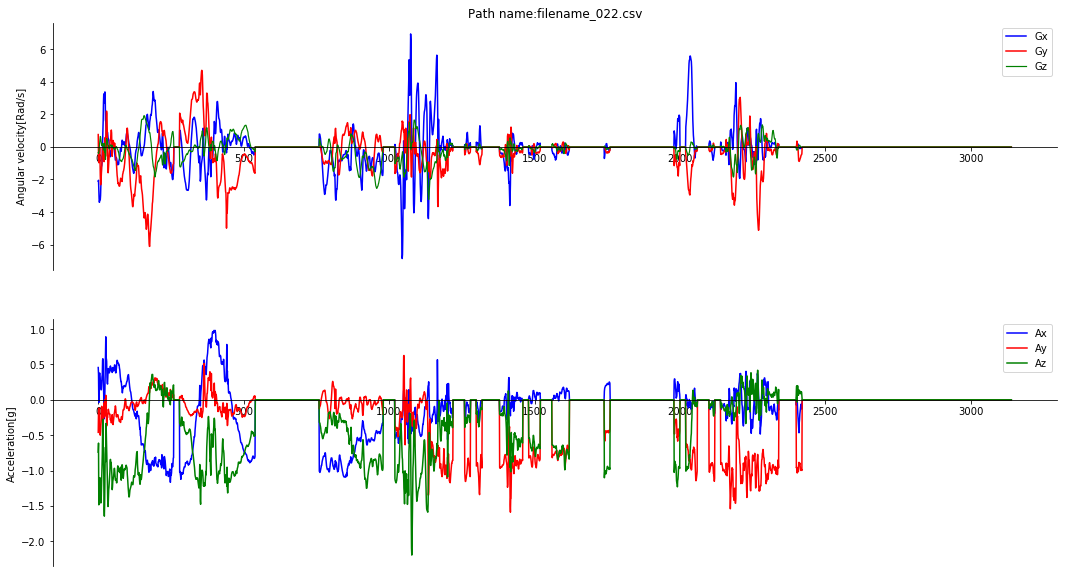

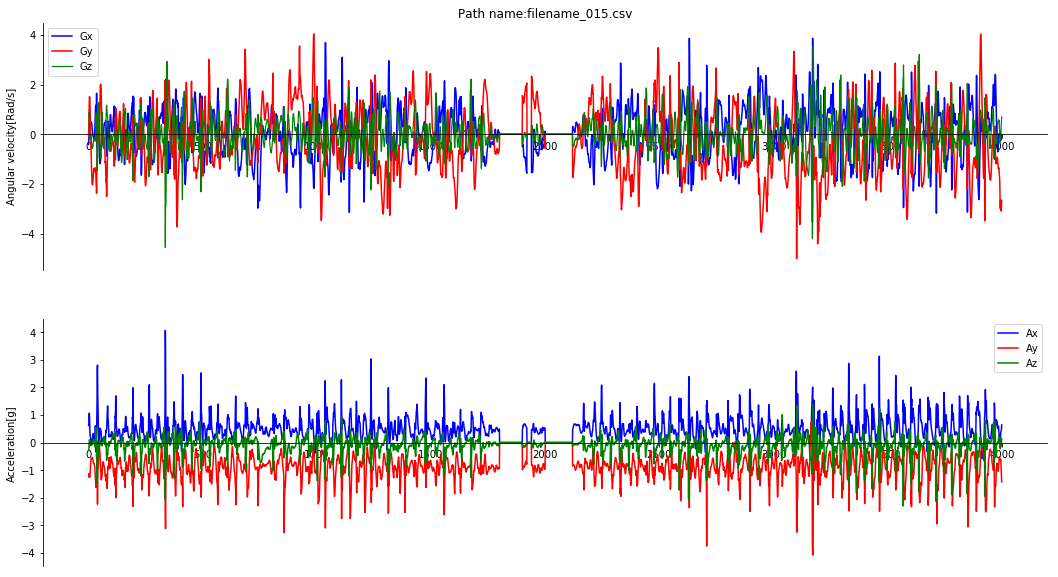

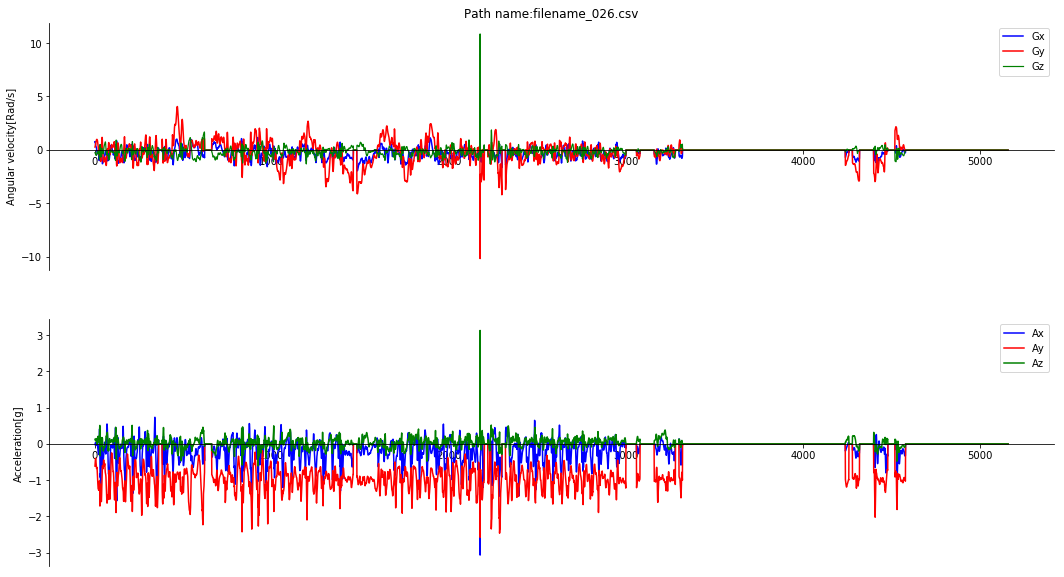

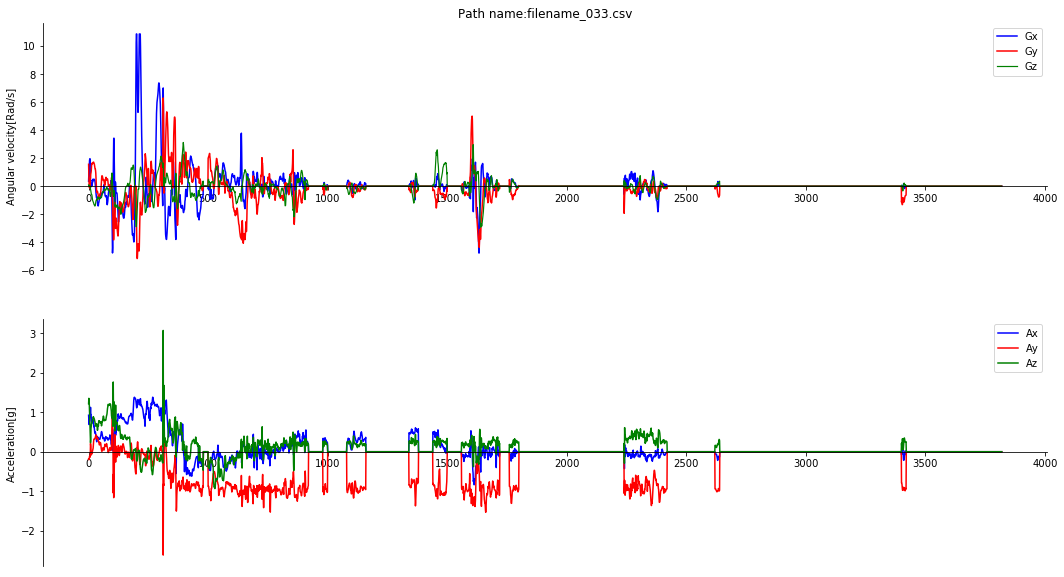

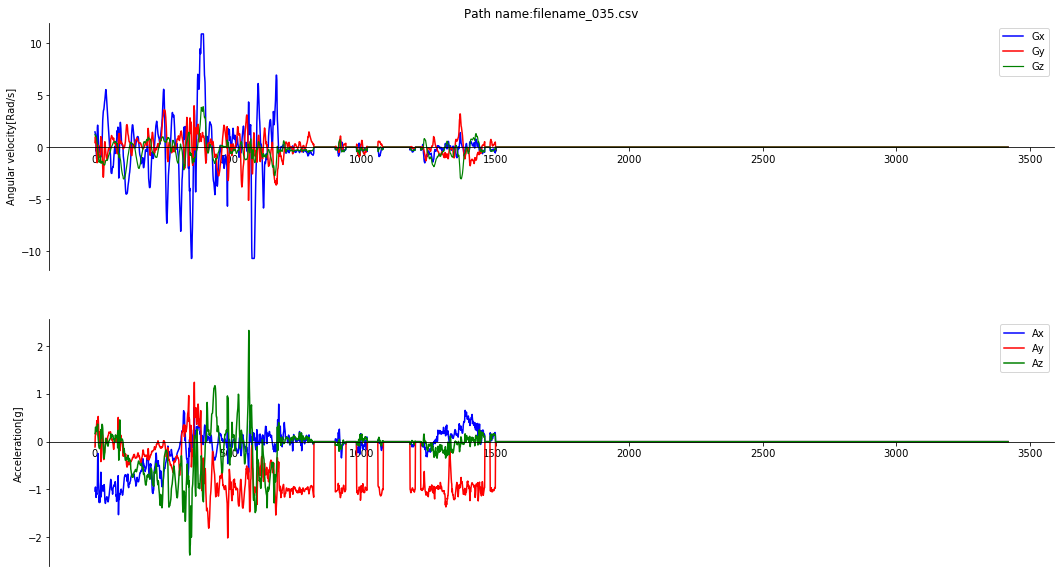

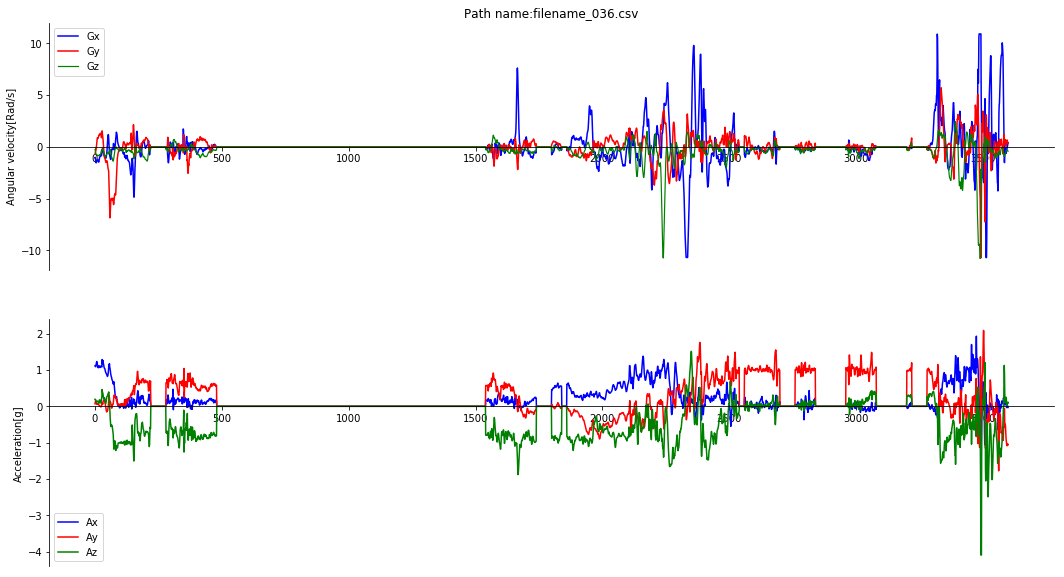

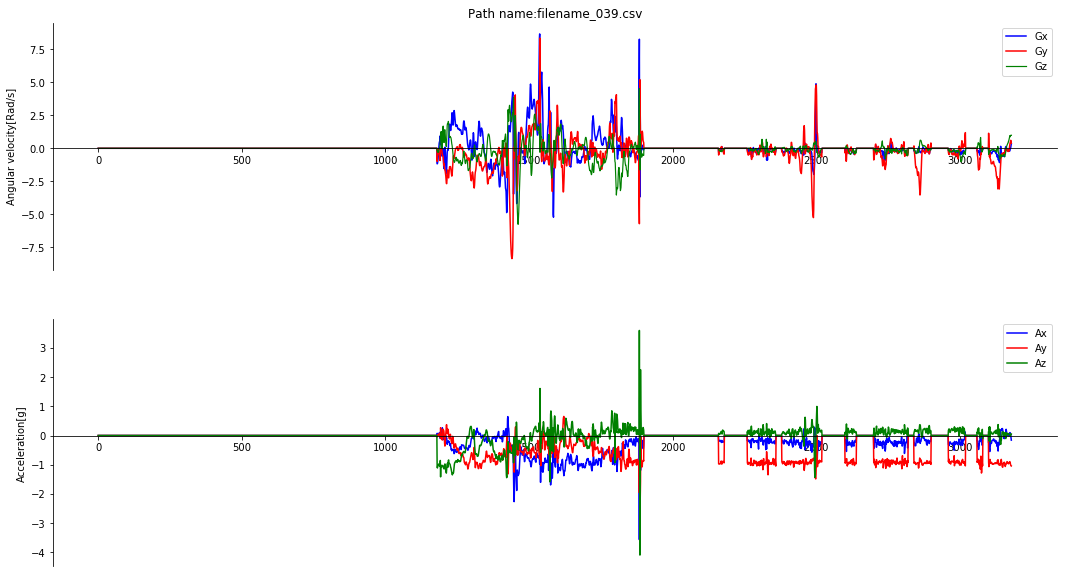

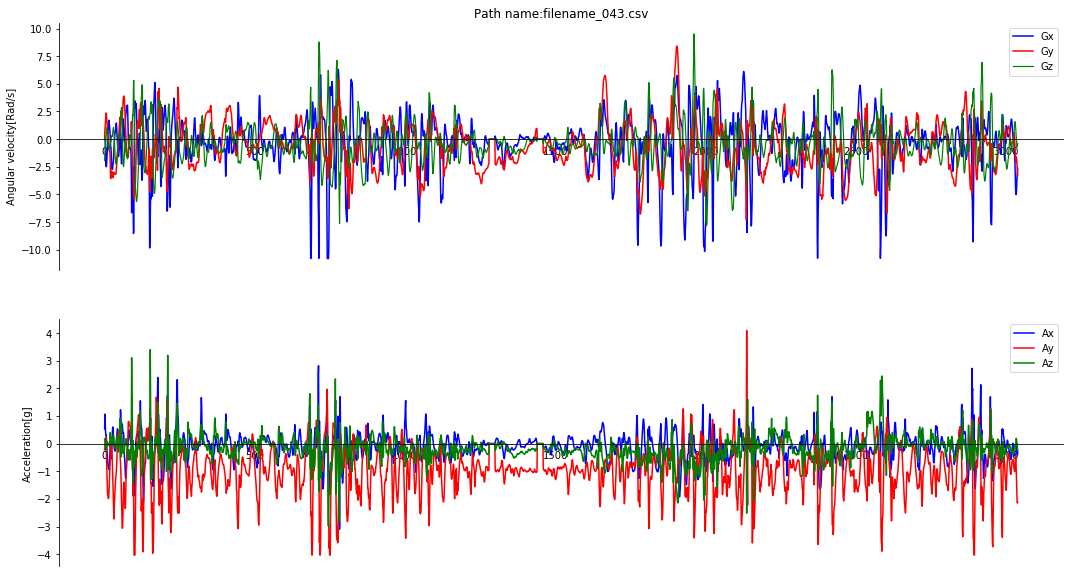

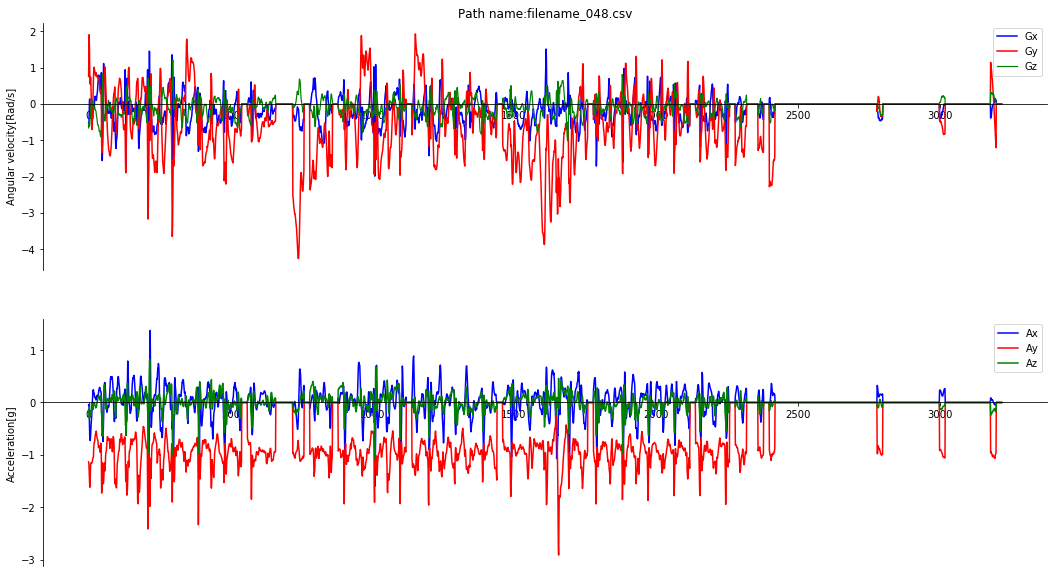

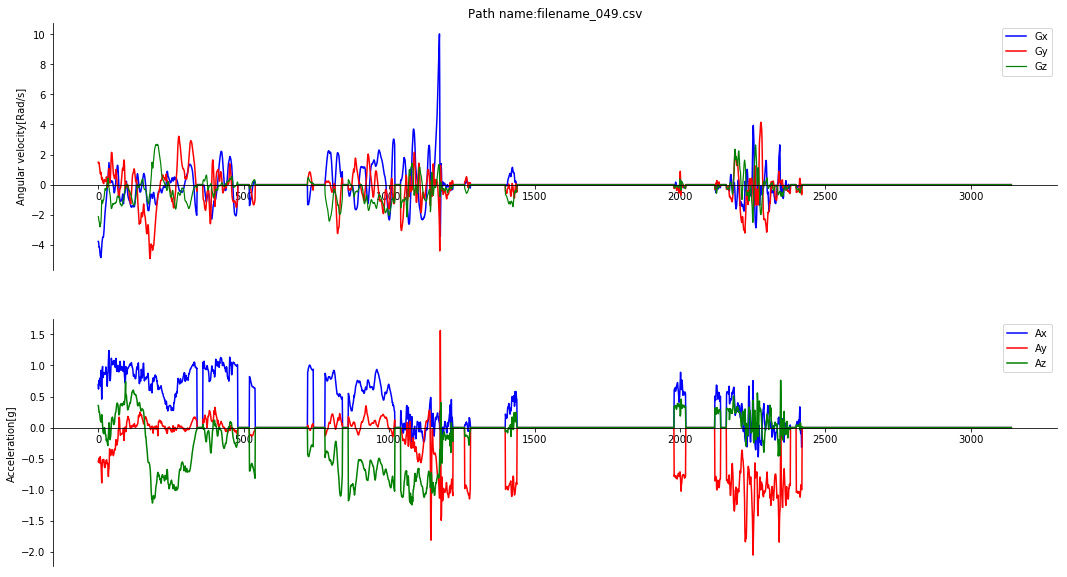

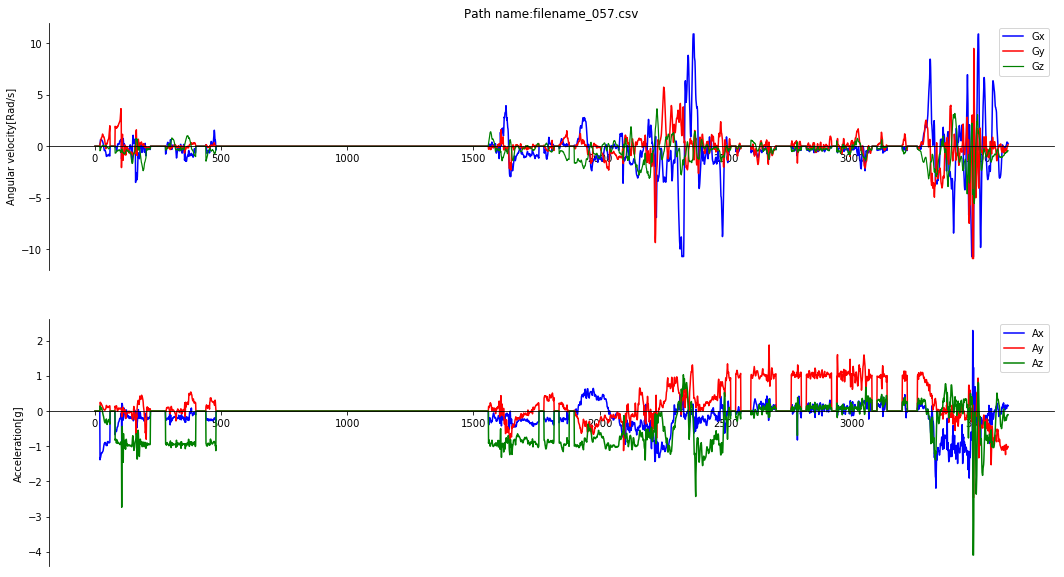

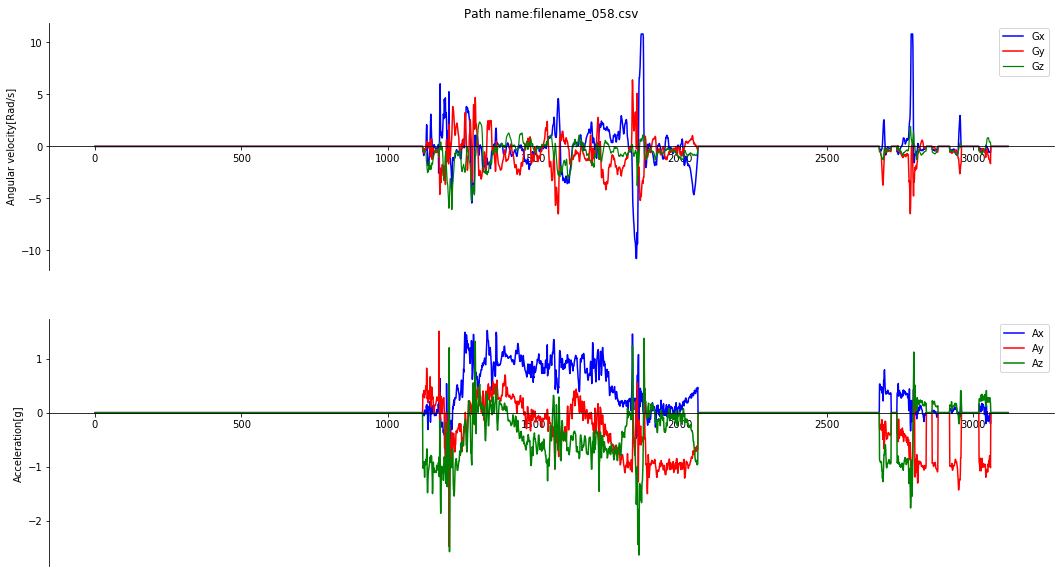

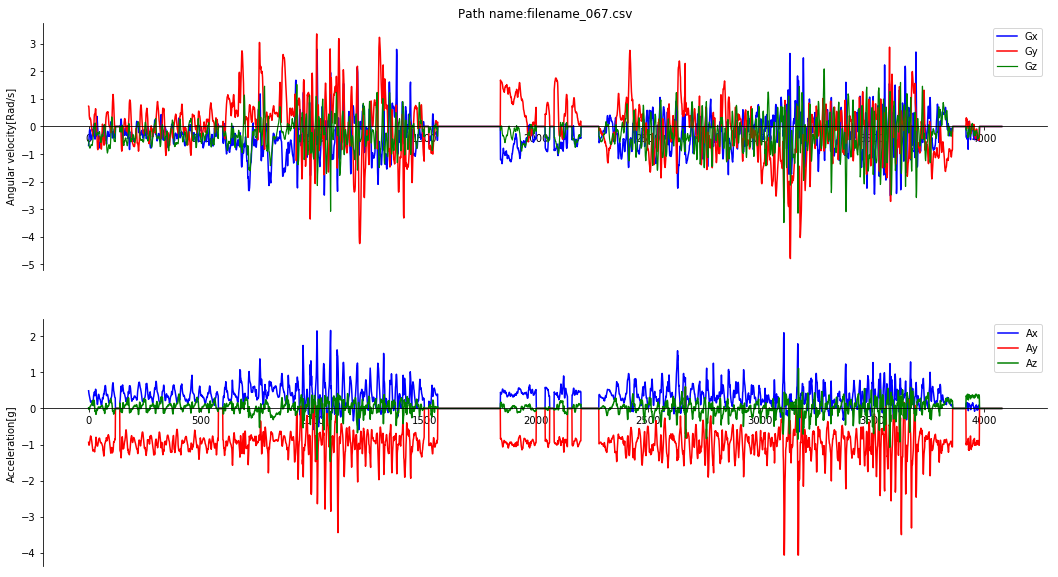

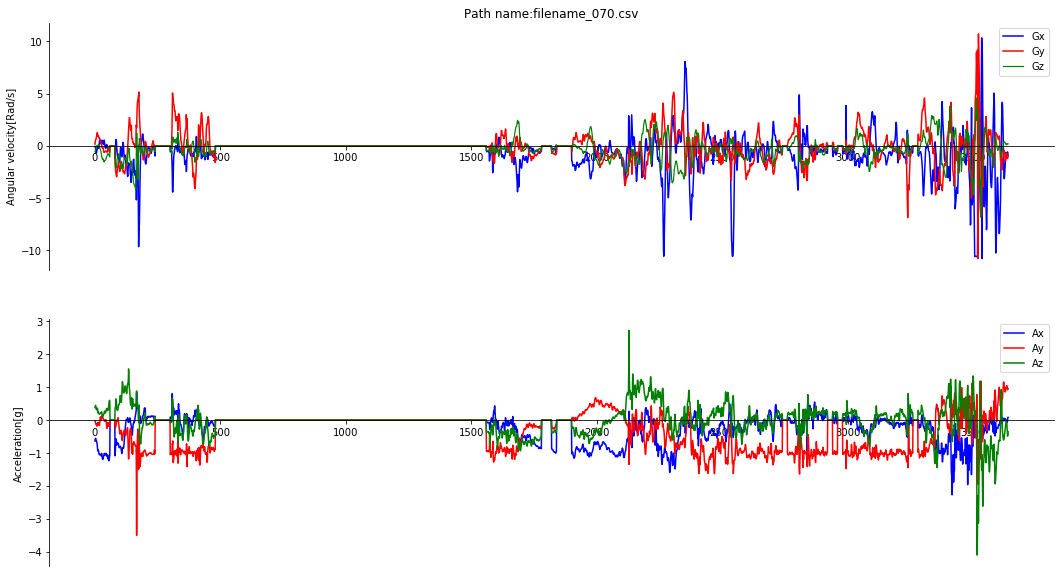

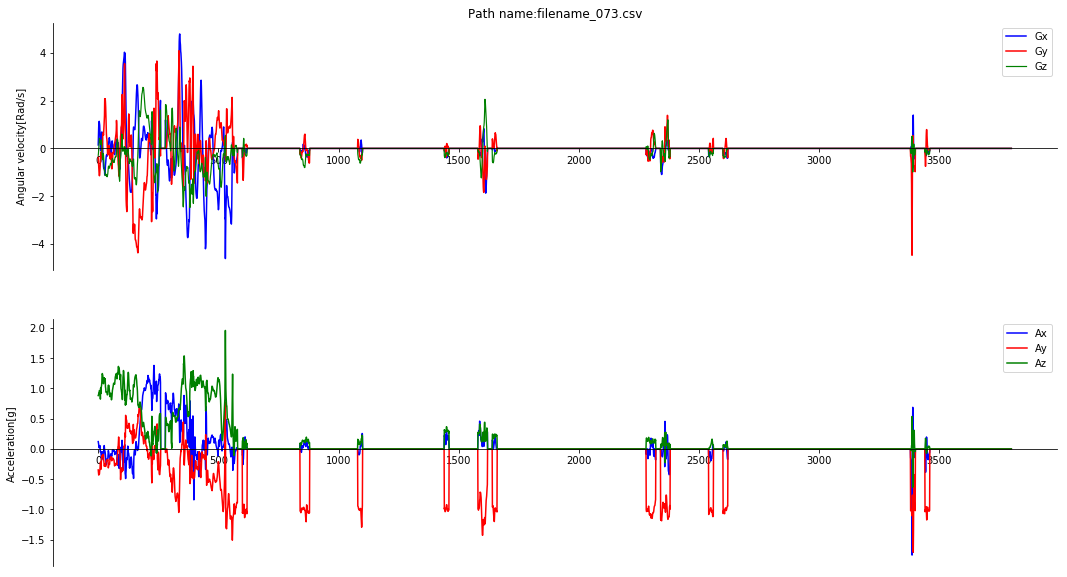

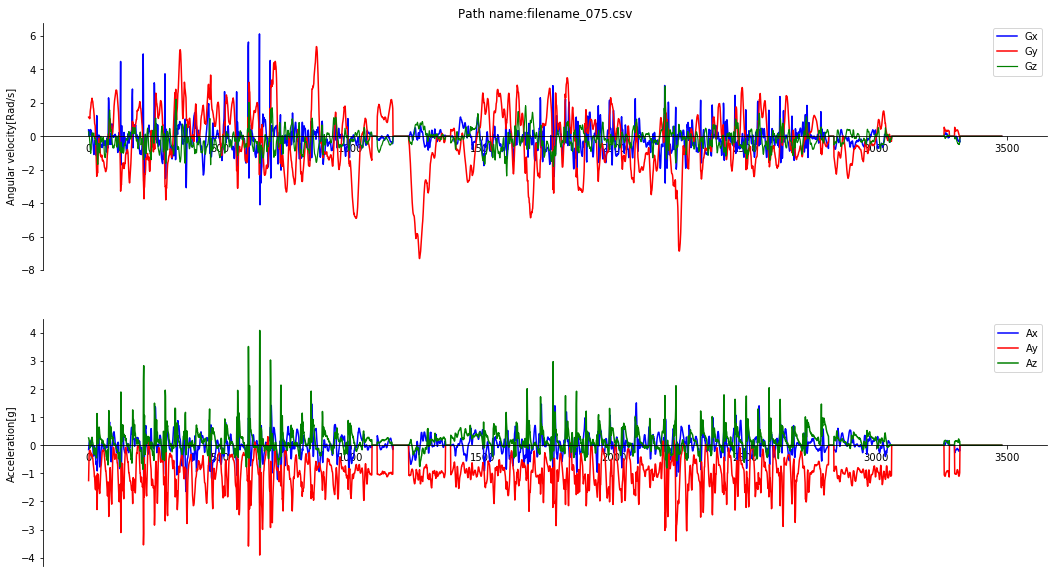

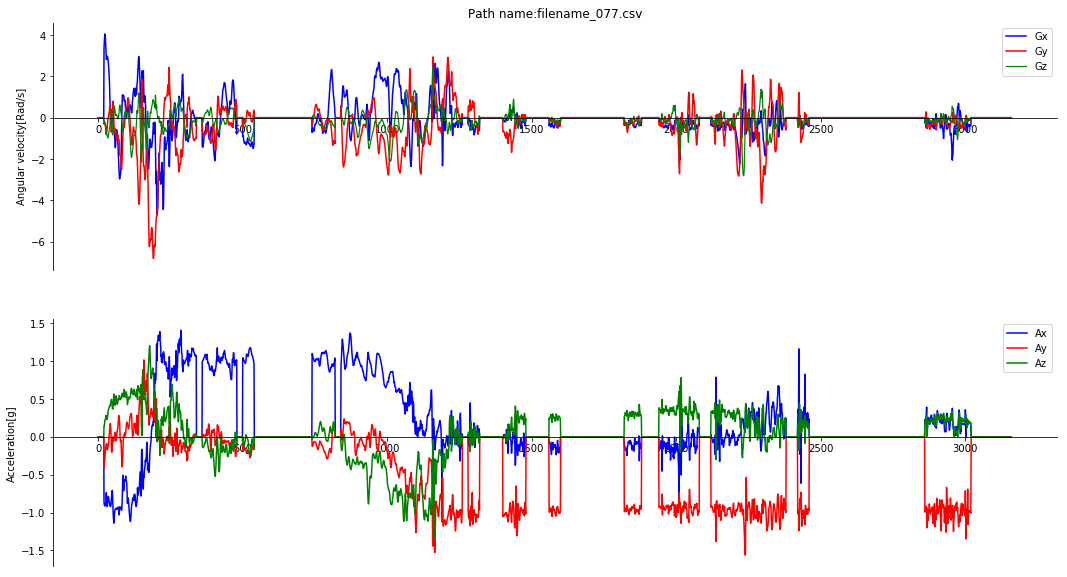

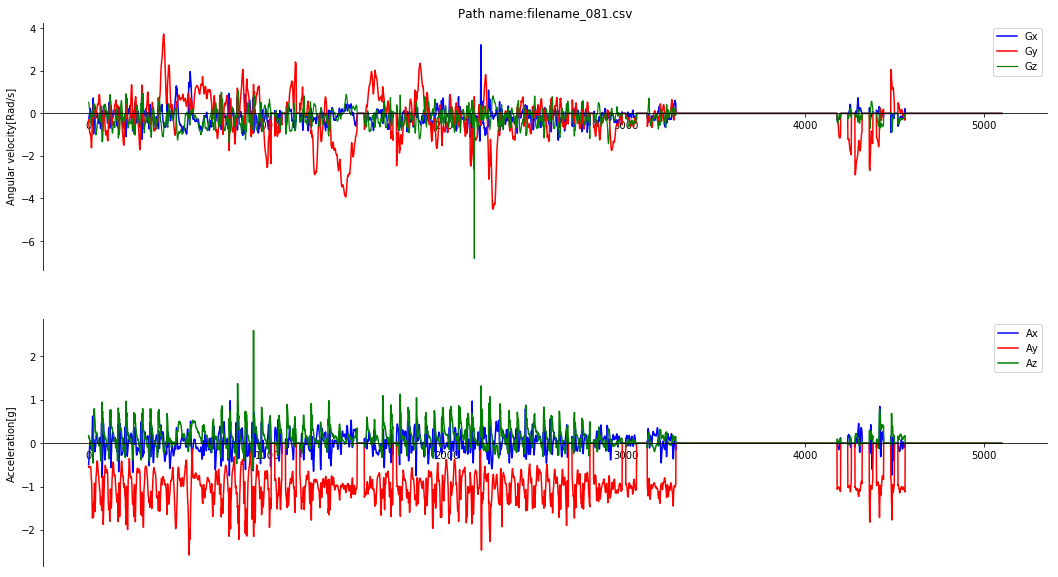

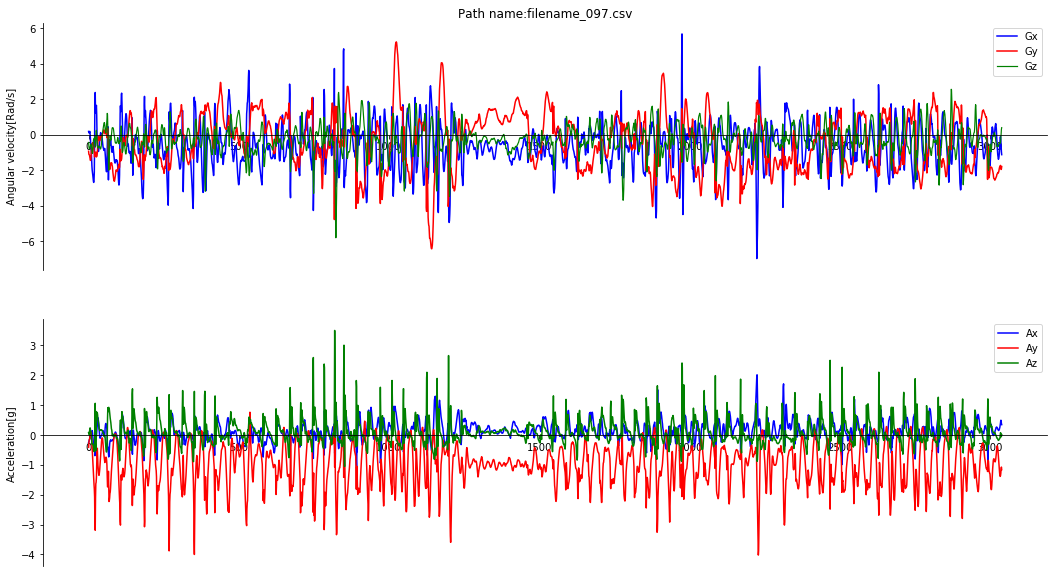

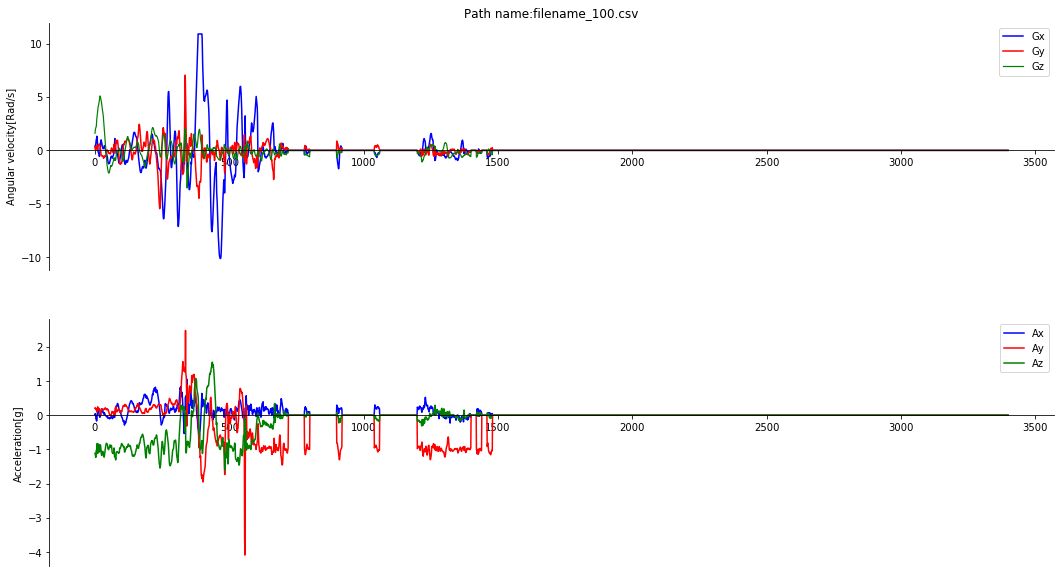

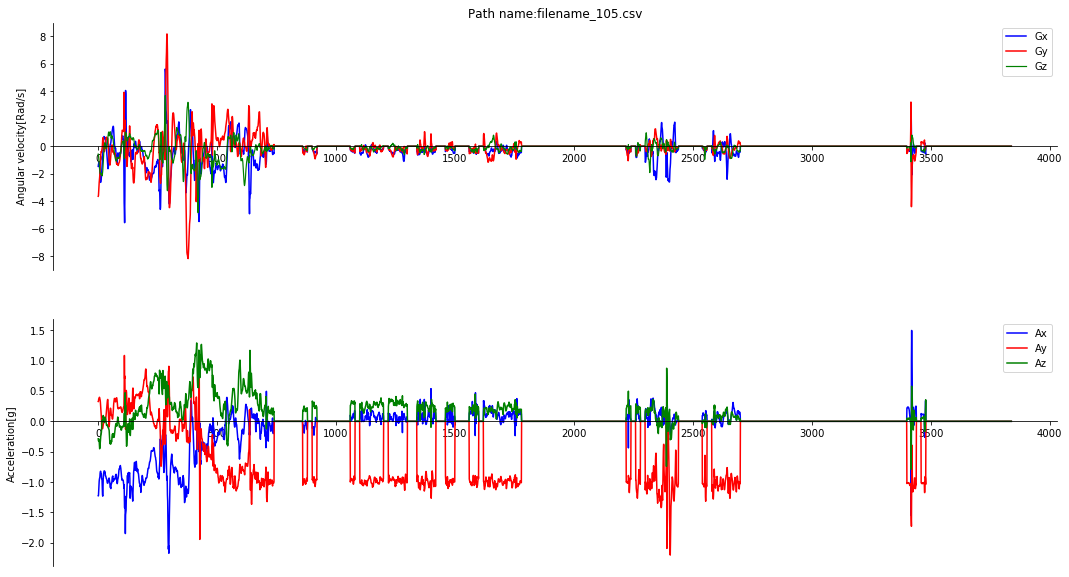

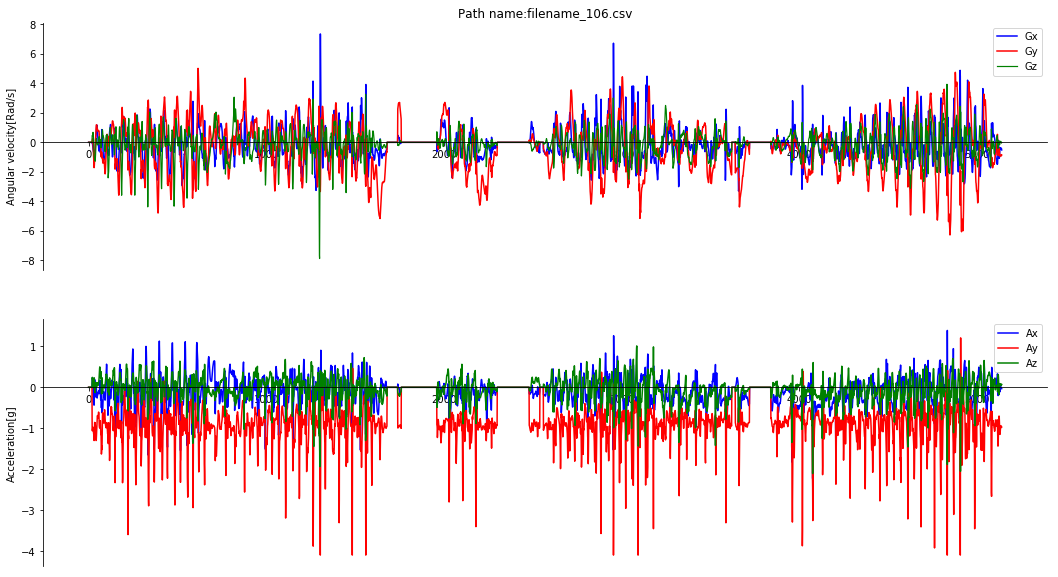

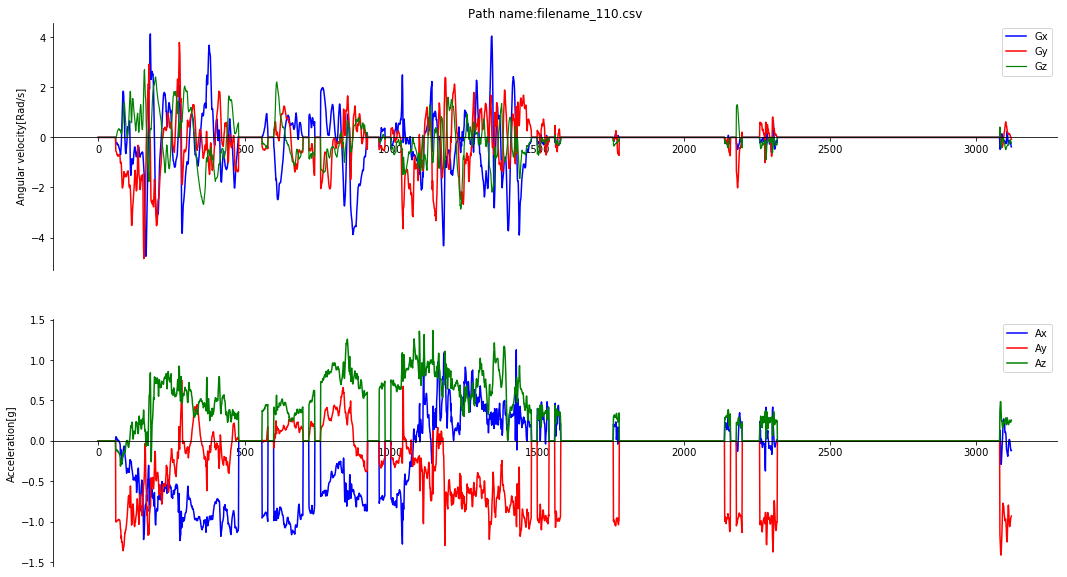

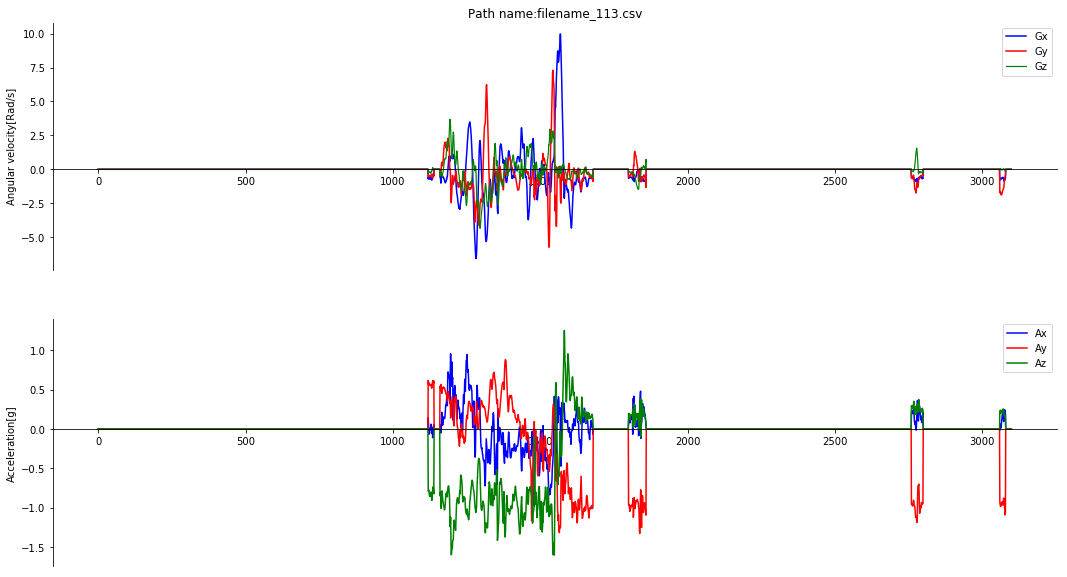

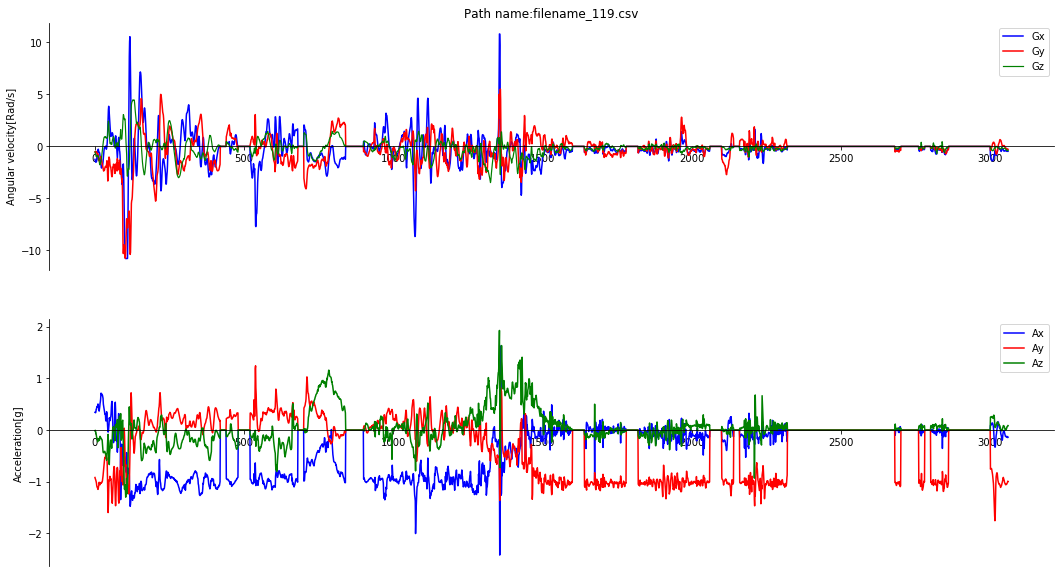

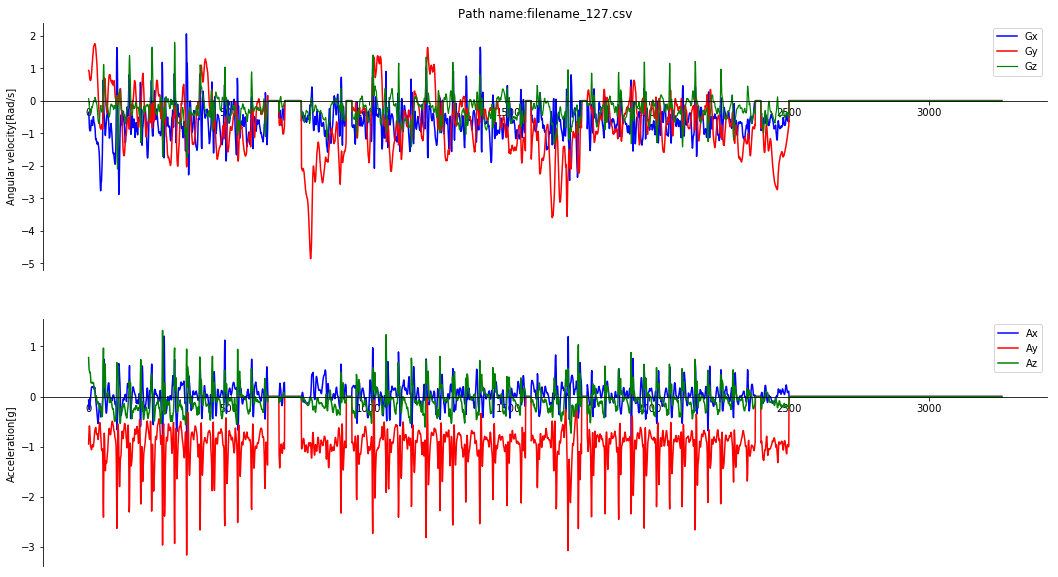

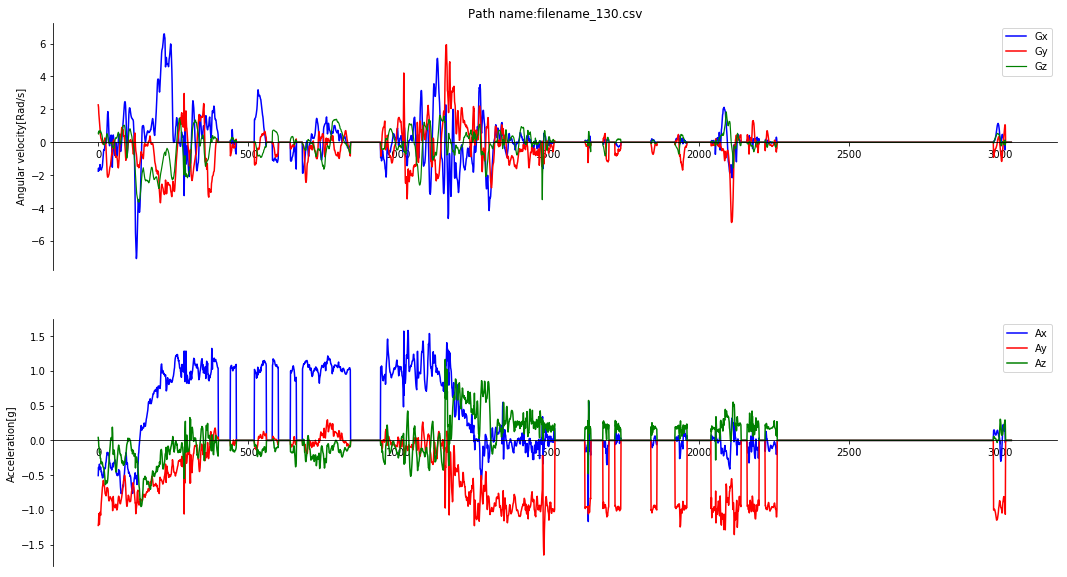

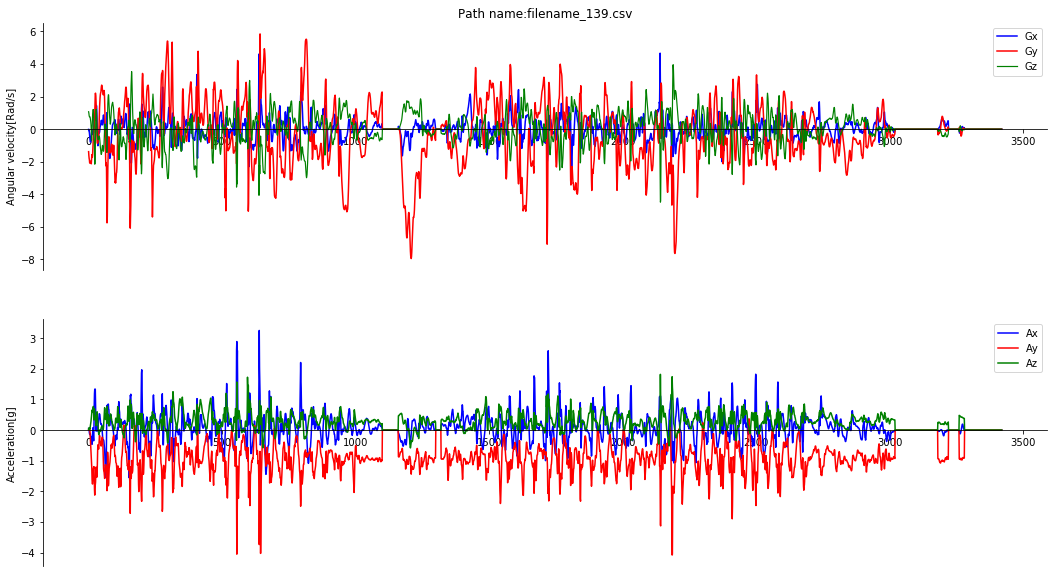

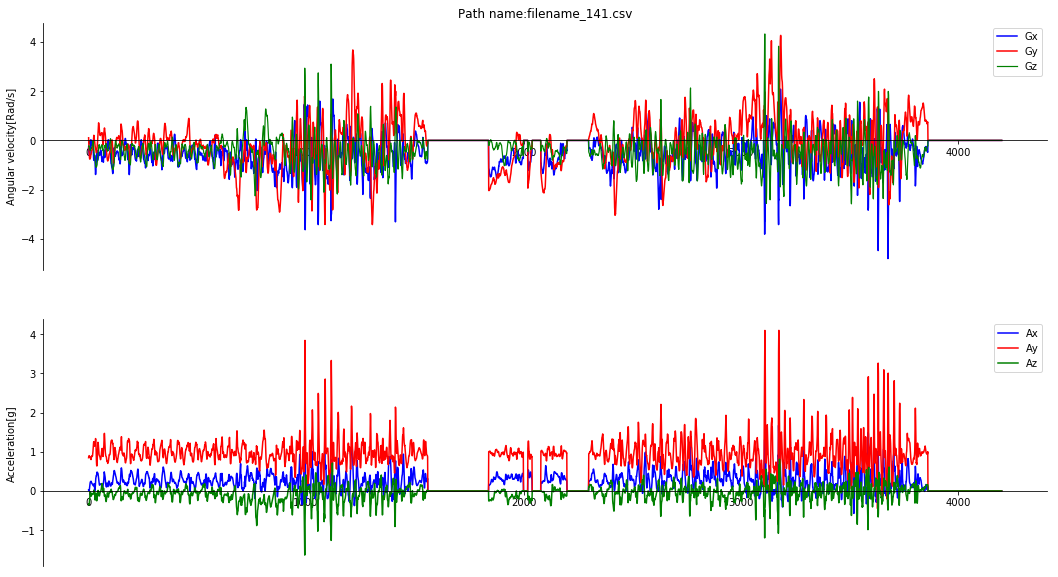

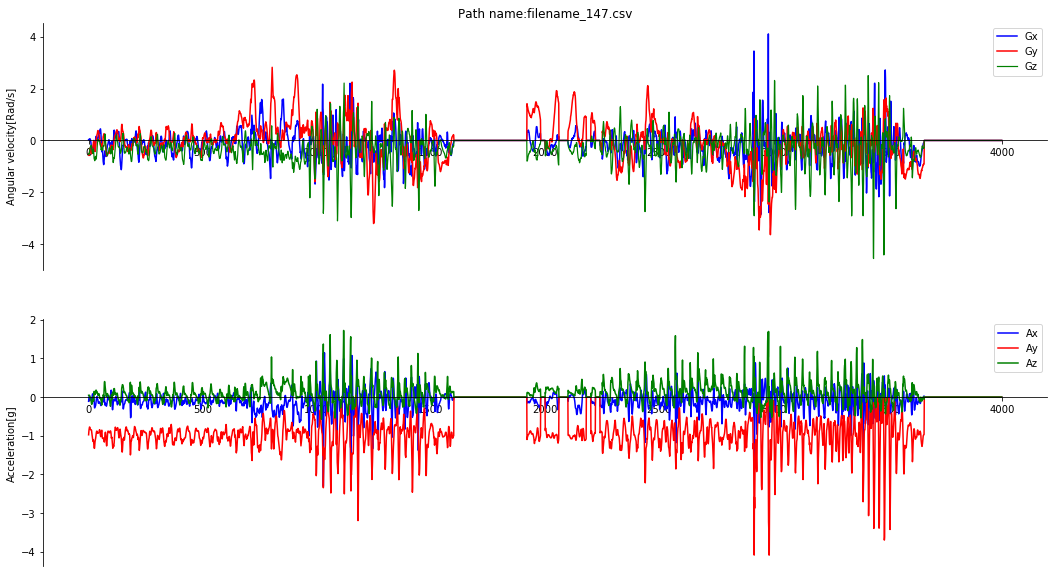

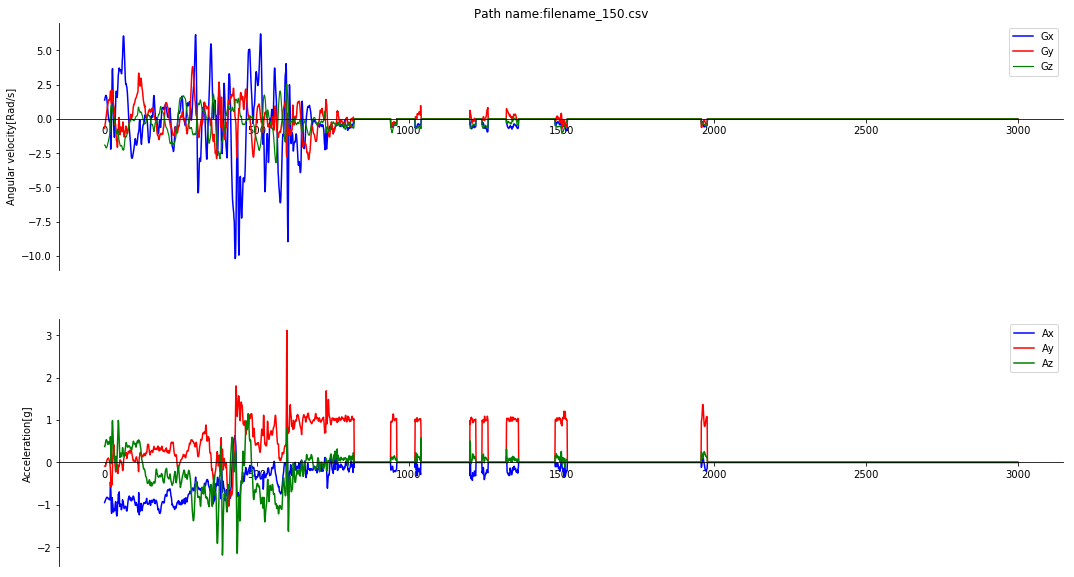

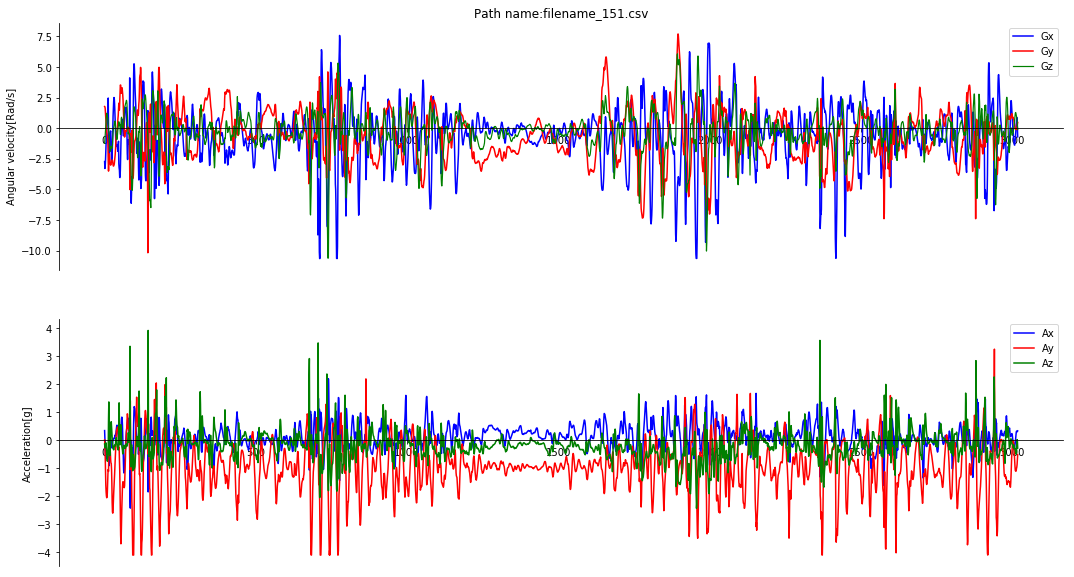

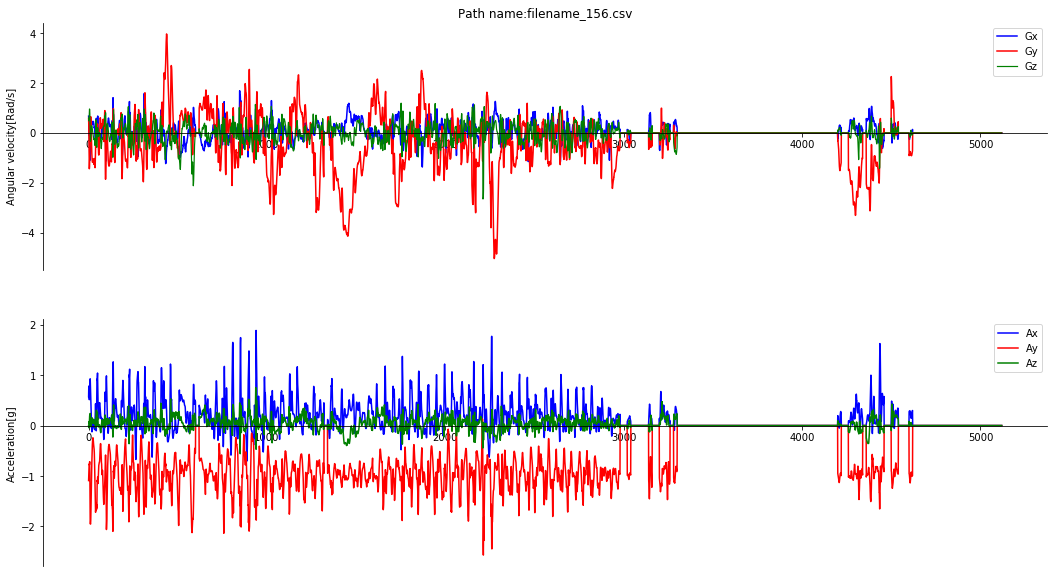

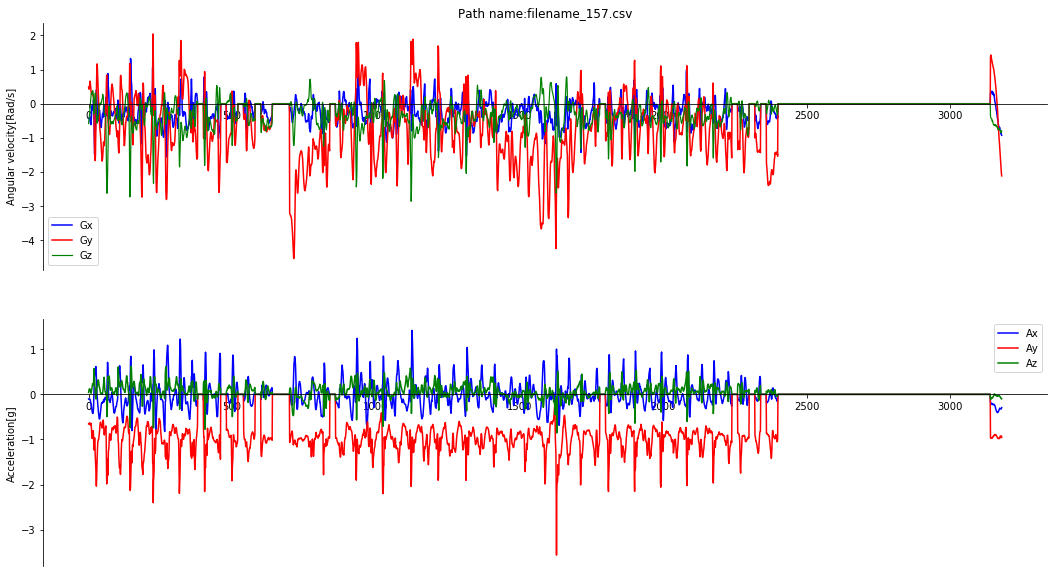

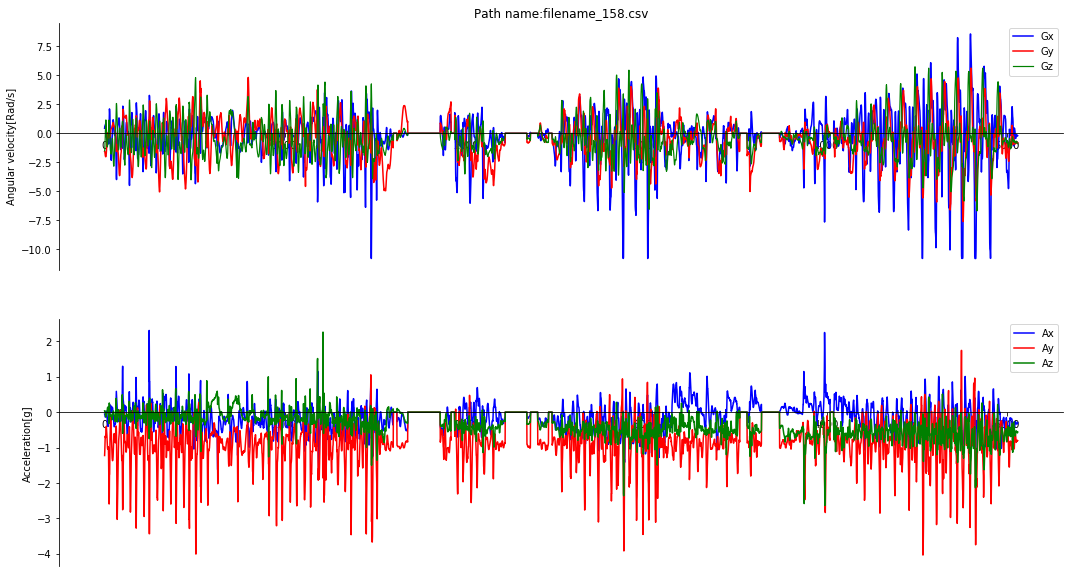

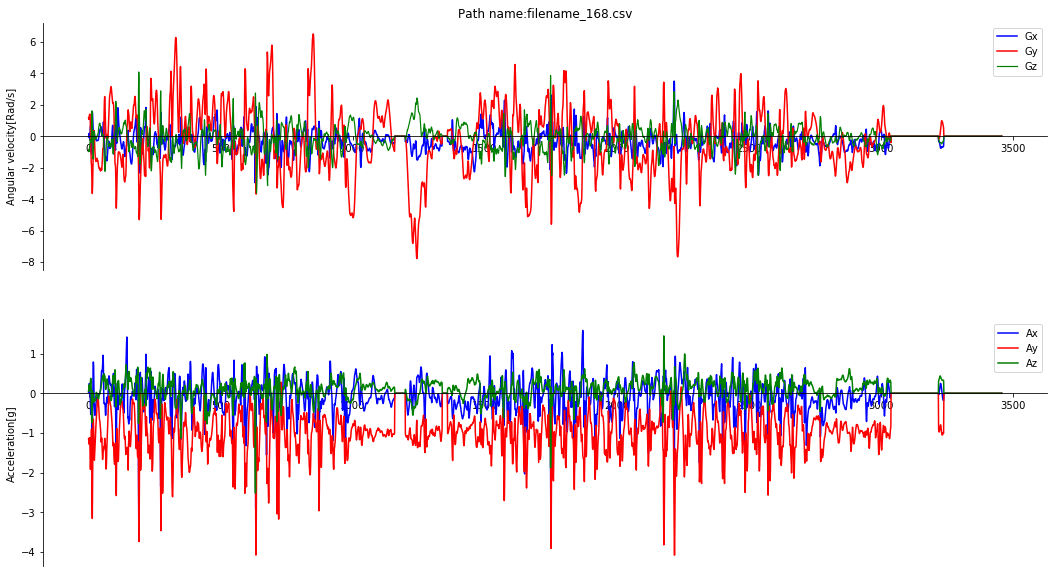

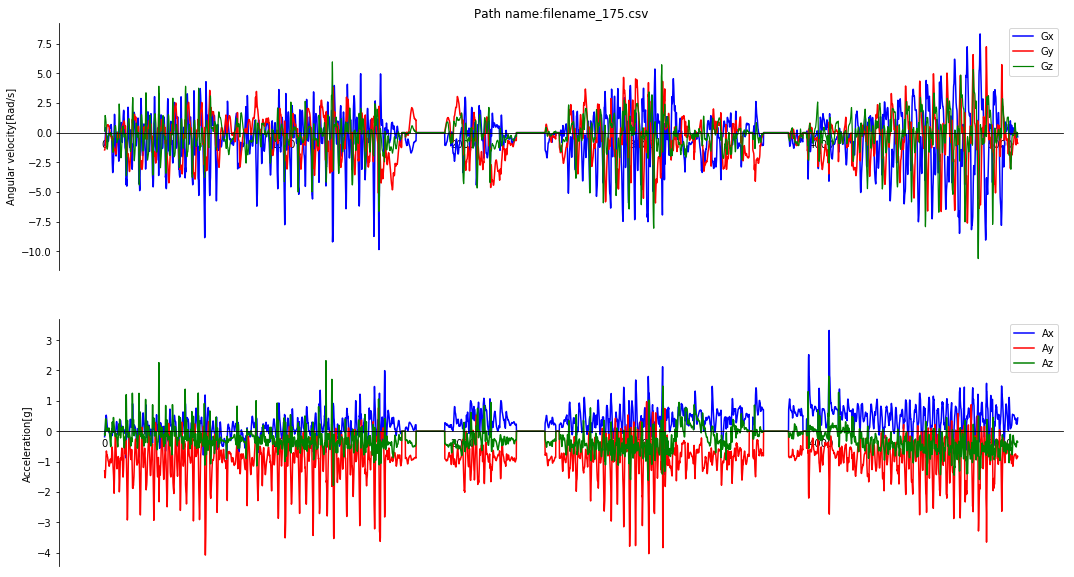

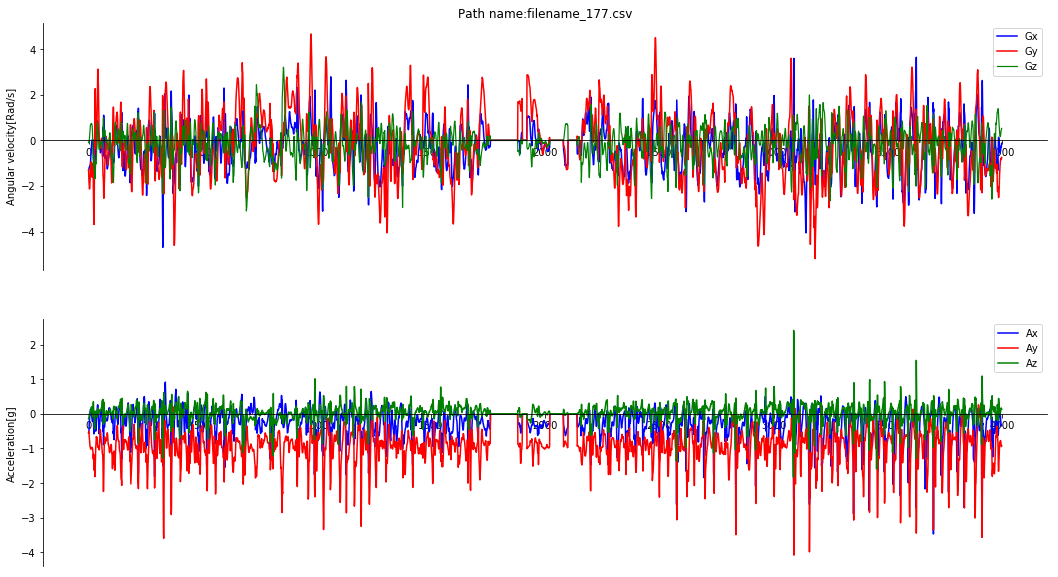

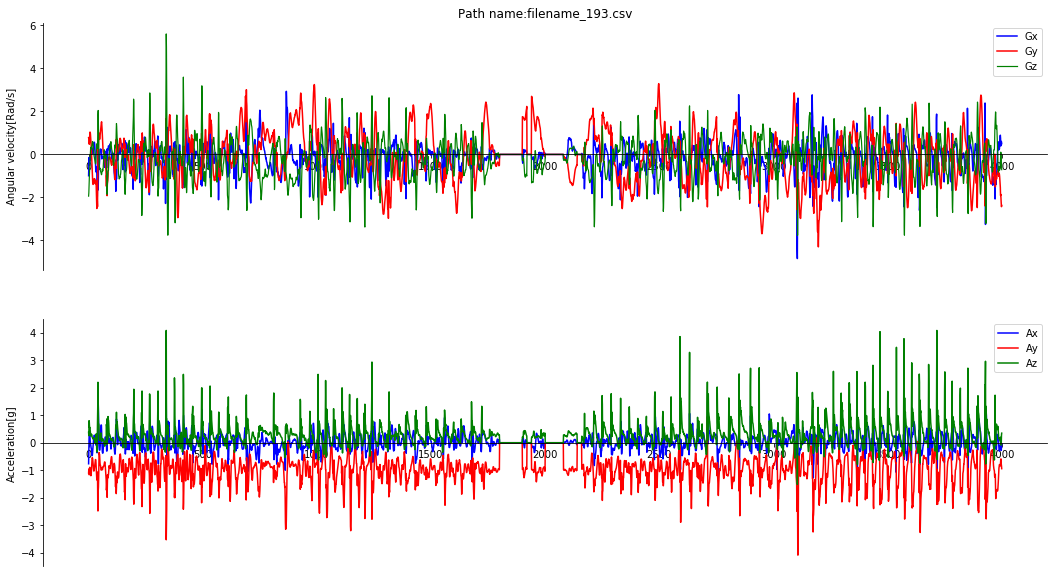

In [34]:
for t in test:
    df,path=generate_cleaned_datasets(t)
    plot_cleaned_datasets(df,path)

In [40]:
for t in test:
    df,path=generate_cleaned_datasets_remove(t)
    df.to_csv(t[:-4]+'_cleaned.csv')
#     plot_cleaned_datasets(df,path)